In [ ]:
library(dplyr)
library(ggplot2)
library(RColorBrewer)
suppressPackageStartupMessages(library(viridis))

source("/projects/ps-renlab2/y2xie/scripts/Paired-HiC/phc_help.R")
source("/projects/ps-renlab2/y2xie/scripts/basics.R")

## Cutoff selection

In [1]:
sample <- read.table("../scripts/meta")
head(sample)

,V1,V2,V3
,<chr>,<chr>,<chr>
1,LV009,Liver,pool-1_240712-1PFA
2,LV012,Liver,pool-1_240712-2PFA-rep2
3,LV021,Heart,pool-1_RV-2PFA-rep1
4,LV022,Heart,pool-1_RV-2PFA-rep2
5,LV023,Heart,pool-2_LA-2PFA-rep1
6,LV024,Heart,pool-2_LA-2PFA-rep2


In [ ]:
stat <- list()
valid <- list()
for (f in sample$V1){ 
    file <- list.files(path = "../03.mapping/", pattern = paste0("^", f, ".*.sc.stat.csv$"))
    stat[[f]] <- read.csv(paste0("../03.mapping/", file), sep = "\t", row.names = 1) %>% 
    setNames(c("total","mapped","unmapped","duplicate","cis","cis_1kb-","cis_1kb+","cis_10kb+","trans"))
    valid[[f]] <- PHCrankPair(obj = stat[[f]], prefix = paste0(f))
    
    ### remove top cells
    tcutoff <- quantile(log10(stat[[f]][valid[[f]], ]$total), probs = 0.995)
    tmeta <- stat[[f]][valid[[f]],] %>% filter(total <= 10^tcutoff)
    write.table(tmeta, file = paste0(f, "_valid_cells.txt"),row.names = T, col.names = T, 
                sep = "\t", quote = F)
}

## Valid pairs summary

In [ ]:
for (f in sample$V1){
    valid <- read.table(paste0(f, "_valid_cells.txt"), row.names = 1, header = T)
    PHCplotPair(valid, count_min = 0, count_max = 1000000, prefix = paste0(f)) %>% 
    setNames(c("total","mapped","unmapped","duplicate","cis","cis_1kb-","cis_1kb+","cis_10kb+","trans"))
}

## Include demultiplex information

In [10]:
sng <- allcell <- list()
for (f in sample$V1){
    file <- list.files("demul/", pattern = paste0(".*", f, ".*"))
    stable <- read.table(paste0("demul/", file), header = T, row.names = 2) %>%
    filter(DROPLET.TYPE == "SNG") %>% mutate(LIBRARY = f) # %>% select(c(SNG.BEST.GUESS, LIBRARY))
    sng[[f]] <- merge(stable, stat[[f]], by = 0)
    allcell[[f]] <- stable
}
sng <- do.call(rbind, sng)
allcell <- do.call(rbind, allcell)

dim(sng)

write.table(sng, "FNIH_Heart_DHC_demultiplex_SNG.summary", sep = "\t", quote = F, row.names = F, col.names = T)
write.table(allcell, "FNIH_Heart_DHC_demultiplex_allcells.summary", sep = "\t", quote = F, row.names = F, col.names = T)

[1] 84057    30

## Write singlet for imputation

In [ ]:
sng <- sng %>% filter(LIBRARY %in% sample[sample$V2 == "Heart", ]$V1)
donor_info <- read.table('../../81.FNIH_DPT_IGM_240827/reference/CAREHF_FNIH_donor.simple.info', sep = "\t", row.names = 1, header = T)
sng$Donor <- gsub(".*-([^-]+)$", "\\1", sng$SNG.BEST.GUESS)

sngt <- sng %>% select(c(Row.names, LIBRARY)) %>%
setNames(c("barcode", "library")) %>%
mutate(sample = paste0(library, "_hg38.sc.pairs.gz"), cluster = paste0(library, "_", barcode))

write.table(sngt, "FNIH_Heart_DHC_demultiplex_SNG.cluster_info.txt", 
            sep = "\t", quote = F, row.names = F, col.names = T)

## Summarize valid cells data

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”


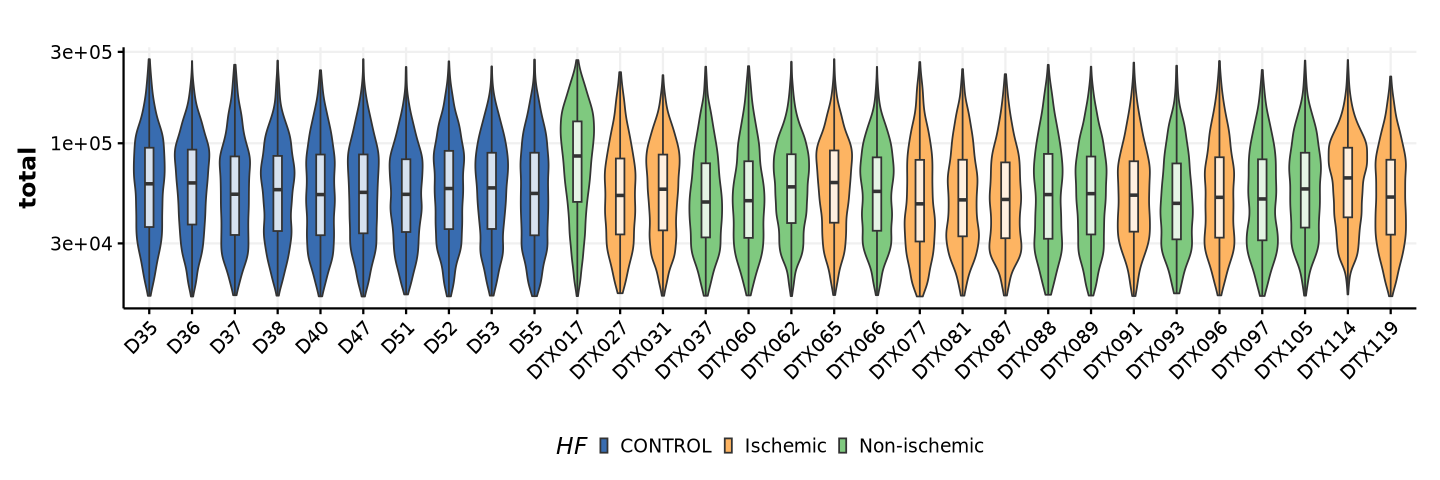

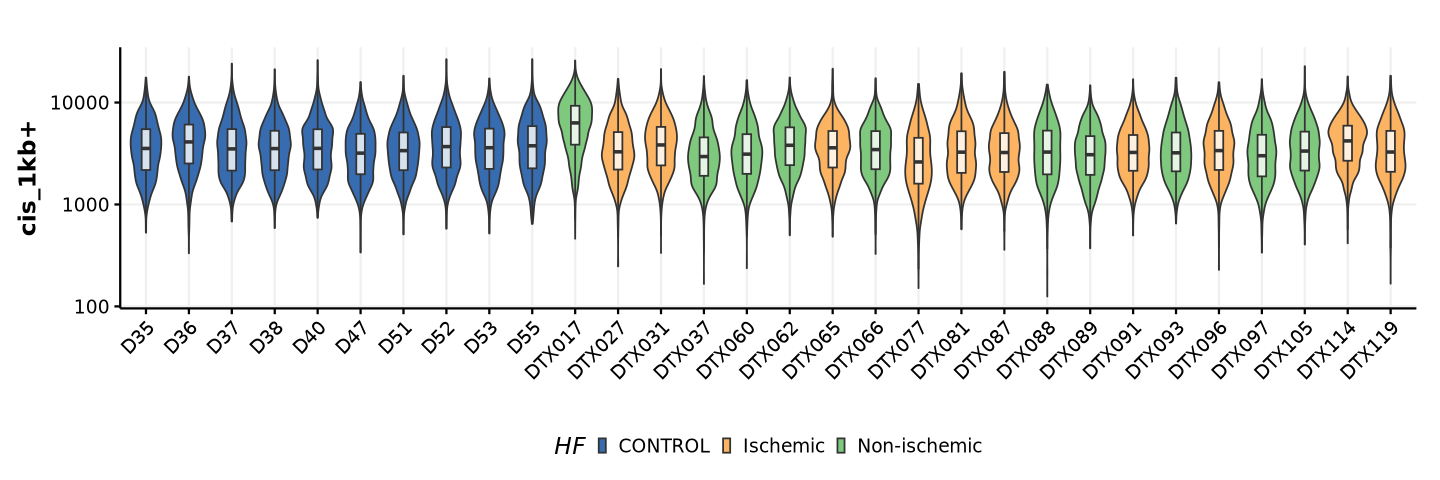

In [25]:
options(repr.plot.width = 12, repr.plot.height = 4)

sng %>%
ggplot(aes(x = Donor, y = total)) +
geom_violin(aes(fill = HF)) + 
geom_boxplot(width = 0.2, coef = 2, fill = "white", alpha = 0.8, outlier.shape = NA, position = position_dodge(0.7)) +
theme_Publication() + xlab("") +
scale_y_log10() + scale_fill_Publication() + 
theme(axis.text.x = element_text(angle = 45, hjust = 1))

options(repr.plot.width = 12, repr.plot.height = 4)

sng %>%
ggplot(aes(x = Donor, y = `cis_1kb+`)) +
geom_violin(aes(fill = HF)) + 
geom_boxplot(width = 0.2, coef = 2, fill = "white", alpha = 0.8, outlier.shape = NA, position = position_dodge(0.7)) +
theme_Publication() + xlab("") +
scale_y_log10() + scale_fill_Publication() + 
theme(axis.text.x = element_text(angle = 45, hjust = 1))

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”


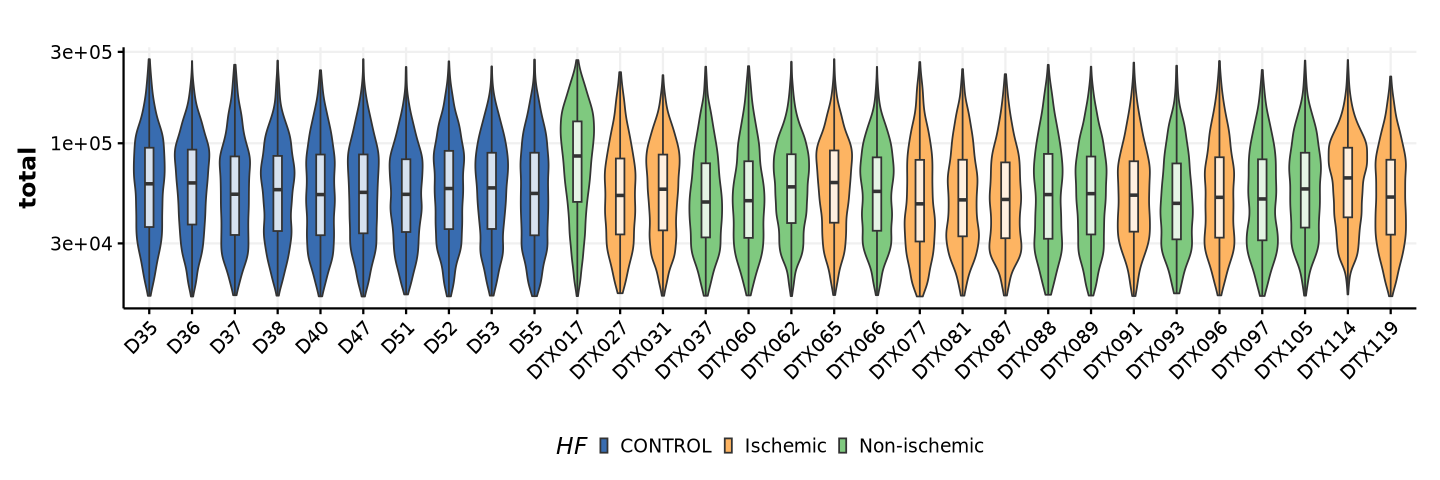

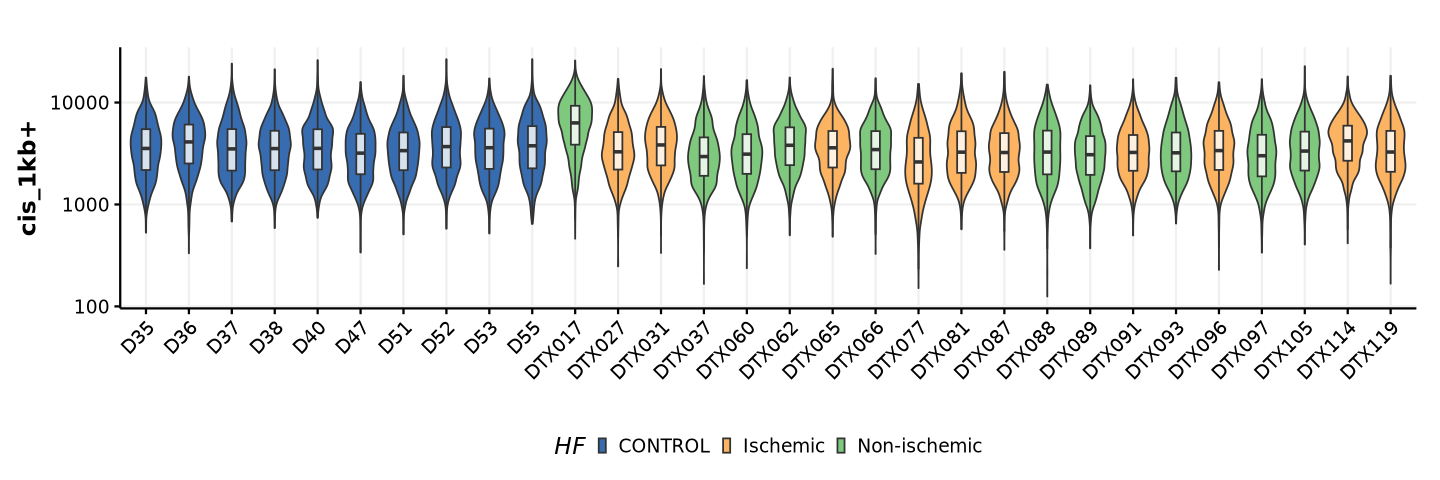

In [31]:
options(repr.plot.width = 12, repr.plot.height = 4)

sng %>%
ggplot(aes(x = Donor, y = total)) +
geom_violin(aes(fill = HF)) + 
geom_boxplot(width = 0.2, coef = 2, fill = "white", alpha = 0.8, outlier.shape = NA, position = position_dodge(0.7)) +
theme_Publication() + xlab("") +
scale_y_log10() + scale_fill_Publication() + 
theme(axis.text.x = element_text(angle = 45, hjust = 1))

options(repr.plot.width = 12, repr.plot.height = 4)

sng %>%
ggplot(aes(x = Donor, y = `cis_1kb+`)) +
geom_violin(aes(fill = HF)) + 
geom_boxplot(width = 0.2, coef = 2, fill = "white", alpha = 0.8, outlier.shape = NA, position = position_dodge(0.7)) +
theme_Publication() + xlab("") +
scale_y_log10() + scale_fill_Publication() + 
theme(axis.text.x = element_text(angle = 45, hjust = 1))

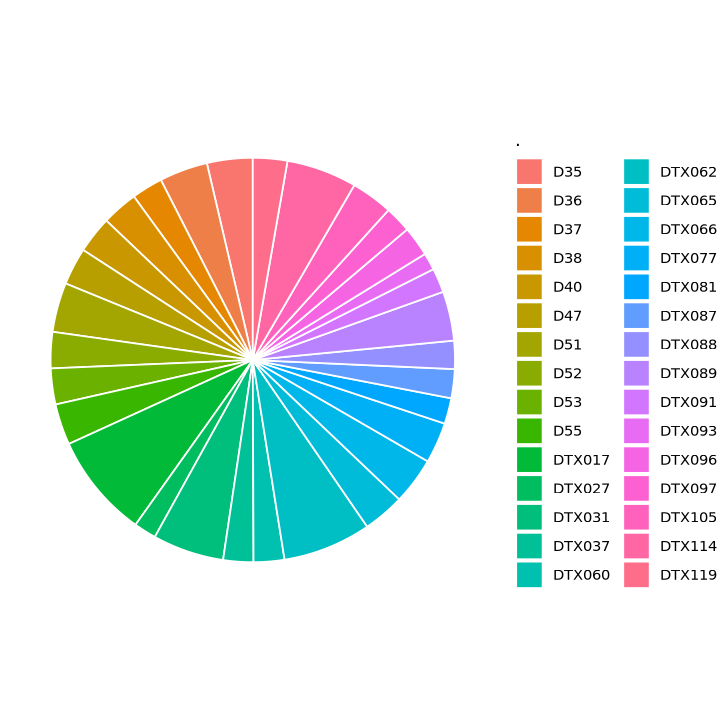

In [30]:
options(repr.plot.width = 6, repr.plot.height = 6)
sng$Donor %>% table %>% as.data.frame %>%
ggplot(aes(x = "", y = Freq, fill = `.`)) +
geom_bar(width = 1, stat = "identity", color = "white", size = 0.5) +
coord_polar(theta = "y") + 
theme_void()

## scHiCluster pre-process

1. split valid cells into single pairs file: `phc.batch_splitPairs_single.sh`
2. filter contacts overlapping ENCODE blacklist: `hicluster filter-contact`
3. calculate GAD score using filtered, raw contacts: `hicluster gene-score`
4. prepare and run imputation on three resolutions (10, 25, 100kb): `hicluster prepare-impute`